# Data Description & Exploratory Data Analysis and Visualization

# Data Description


The Employee dataset from [kaggle](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset) is the a anonymized colletion of employee information from a company. It include employees's backgrounds, work hisotry and other employment-related factors.\
**Number of Observation** : 4653 \
**Number of Variables** : 9 

**Variables Overview:**

1. **Education** *(Categorical)*: The highest educational qualification of the employee (e.g., Bachelors, Masters, PhD).

2. **JoiningYear** *(Numeric)*: The year the employee joined the company, indicating their tenure.

3. **City** *(Categorical)*: The city where the employee is based (e.g., Bangalore, Pune, New Delhi).

4. **PaymentTier** *(Categorical)*: The salary tier of the employee, categorized into levels (1 being the highest).

5. **Age** *(Numeric)*: The age of the employee.

6. **Gender** *(Categorical)*: The gender identity of the employee (Male or Female).

7. **EverBenched** *(Categorical)*: Indicates whether the employee has ever been without assigned work (Yes or No).

8. **ExperienceInCurrentDomain** *(Numeric)*: Years of experience the employee has in their current field.

9. **LeaveOrNot** *(Binary)*: Target variable indicating if the employee has left the company (1) or not (0).

**Dataset Origin:** The data was collected internally by the company's HR department for analysis purposes. It has been anonymized to protect privacy while still providing valuable insights into the workforce.

# Question
**Research Question:** Does the length of service influence the payment tier of employees?

**Explanation:** I'm interested in exploring whether employees who have been with the company longer are placed in higher payment tiers. This involves analyzing the relationship between the length of service (calculated from the *JoiningYear*) and the *PaymentTier*.

- **Response Variable:** `PaymentTier`
- **Explanatory Variable:** `Length of Service` (Current Year - JoiningYear)


**Potential Confounding Variables:**

- **Education:** Employees with higher educational qualifications might be placed in higher payment tiers, independently of their length of service.
- **ExperienceInCurrentDomain:** Prior experience could influence payment tier regardless of service length.


**Model Analysis**

This analysis leans towards both **inference** and **prediction**:

- **Inference:**  Trying to understand the  relationship between length of service and payment tier, and how other variables like education may influence this relationship.

- **Prediction:** The relationship can also be use to predict an employee's payment tier based on their length of service and other relevant factors. For instance, HR can estimate the appropriate payment tier for new employees or forecast salary progression for existing staff.

**Potential for Prediction:**

- **Predictive Modeling:** By building a predictive models (e.g., logistic regression), we can predict the payment tier of employees based on variables such as length of service, education, experience, and other factors.

- **Use Cases:**
  - **Recruitment:** Estimating appropriate payment tiers for new employees based on their background and other related factors.
  - **Career Progression Planning:** Forecasting salary progression for existing employees.


# Exploratory Data Analysis and Visualization

### Loading the Dataset

In [205]:
# Load  libraries
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(faraway)
library(broom)
library(leaps)
library(mltools)
library(tidyverse)
library(GGally)
library(ggplot2)
library(patchwork)
library(cowplot)
library(glmnet)
library(rsample)
library(pROC)
library(knitr)
library(caret)
# Read the data
employee_data <- read_csv("Employee.csv")
head(employee_data)

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


### Data Cleaning and Wrangling

In [206]:
# Calculate Length of Service
employee_data <- employee_data|>
                mutate(LengthOfService = 2024 - JoiningYear)
head(employee_data)

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,LengthOfService
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0,7
Bachelors,2013,Pune,1,28,Female,No,3,1,11
Bachelors,2014,New Delhi,3,38,Female,No,2,0,10
Masters,2016,Bangalore,3,27,Male,No,5,1,8
Masters,2017,Pune,3,24,Male,Yes,2,1,7
Bachelors,2016,Bangalore,3,22,Male,No,0,0,8


### Data Type Conversion

Make sure the variables are factors

In [207]:
# Convert to appropriate data types
employee_data$Education <- as.factor(employee_data$Education)
employee_data$City <- as.factor(employee_data$City)
employee_data$PaymentTier <- as.factor(employee_data$PaymentTier)
employee_data$Gender <- as.factor(employee_data$Gender)
employee_data$EverBenched <- as.factor(employee_data$EverBenched)
employee_data$LeaveOrNot <- as.factor(employee_data$LeaveOrNot)


### Check for missing Values

In [208]:
# Check for Null values
sum(is.na(employee_data))

[1] 0

## Looking closer in the variables

In [209]:
age_plot <- ggplot(employee_data, aes(x = Age)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
  labs(title = "Age Distribution of Employees",
       x = "Age",
       y = "Number of Employees") +
  theme_minimal()
education_plot <-ggplot(employee_data, aes(x = Education, fill = Education)) +
  geom_bar() +
  labs(title = "Distribution of Employees by Education Level",
       x = "Education Level",
       y = "Count of Employees") +
  theme_minimal() +
  theme(legend.position = "none")



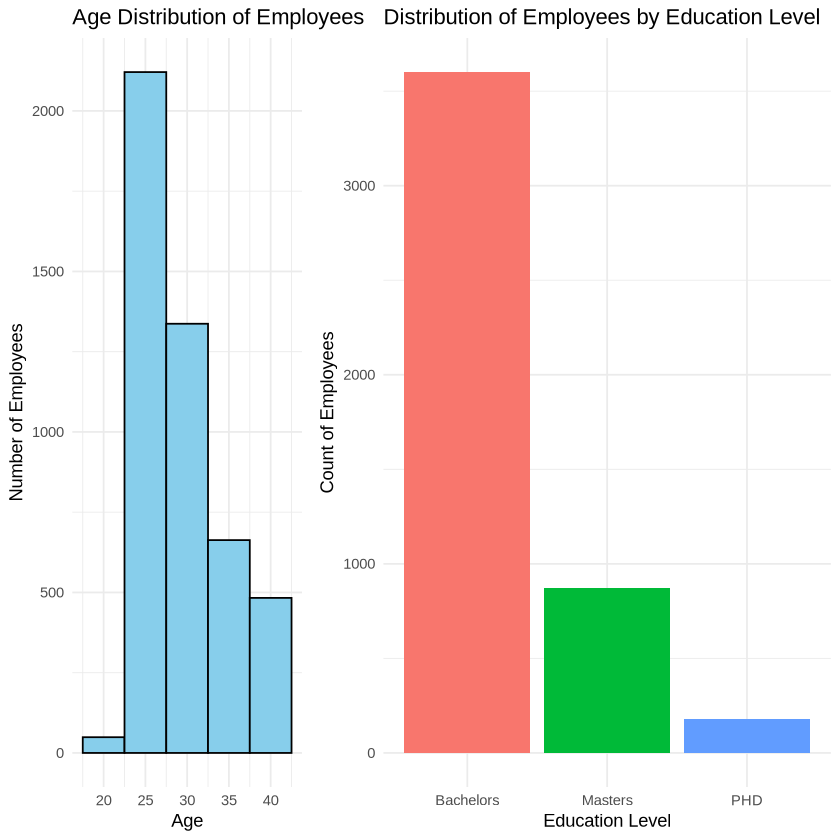

In [210]:
 plot_grid(age_plot, education_plot, rel_widths = c(1, 1.7))  

#### From the above age distribution 
 - The majority of employees are relatively young, with a large peak in the age range between 20 and 30.
 - There is a noticeable decline in the number of employees as age increase, especially above 35. Which can indicate that the workfoce may be more suitable for younger individuals
 -  Also it  may suggest that the company has a younger workforce, which might influence the overall experience levels and payment tiers.

#### From the above education distribution
 -  The bar graph shows that the majority of employees have a Bachlor's degree. This may suggests a hiring preference for this level of education.
 -  It also suggest that the workfoce does not require very high levels of education or specialized research skil. With a most employees with only a Bachlor's degree and relatively few people with a Master or Phd degree

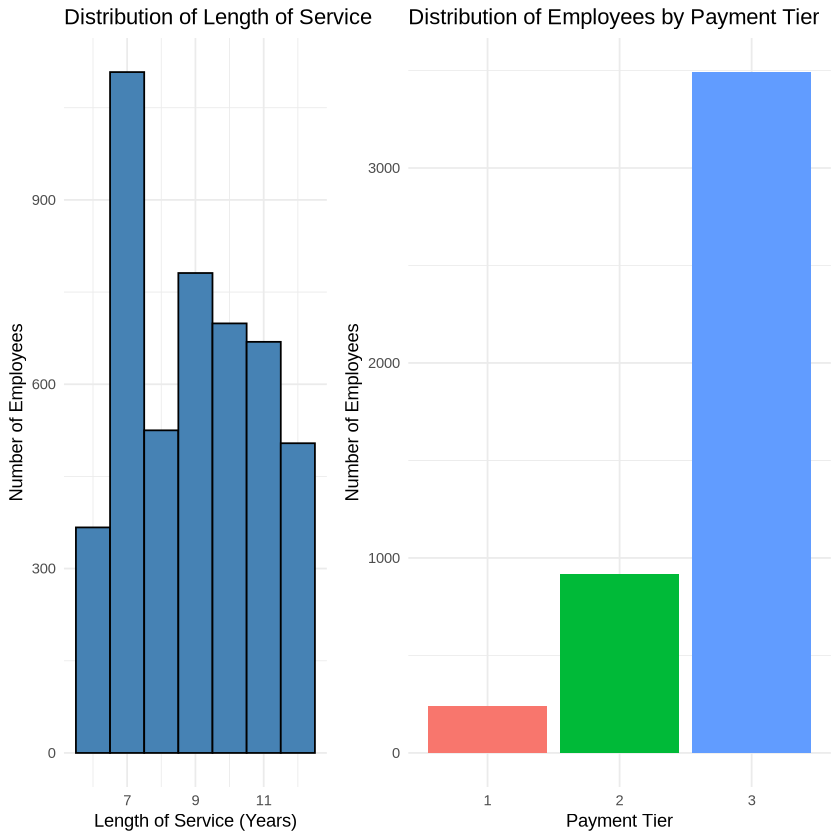

In [211]:
los_plot<-ggplot(employee_data, aes(x = LengthOfService)) +
  geom_histogram(binwidth = 1, fill = "steelblue", color = "black") +
  labs(title = "Distribution of Length of Service",
       x = "Length of Service (Years)",
       y = "Number of Employees") +
  theme_minimal()

payment_plot <-  ggplot(employee_data, aes(x = PaymentTier, fill = PaymentTier)) +
  geom_bar() +
  labs(title = "Distribution of Employees by Payment Tier",
       x = "Payment Tier",
       y = "Number of Employees") +
  theme_minimal() +
  theme(legend.position = "none")

 plot_grid(los_plot, payment_plot, rel_widths = c(1, 1.5))  


### Box plot showing relation bewteen Length of Service and Payment Tier

In [212]:
employee_plot <- employee_data|>
                ggplot(aes(x = PaymentTier, y= LengthOfService, fill = PaymentTier)) +
                geom_boxplot() +
                labs(title = "Length of Service Across Different Payment Tier" , 
                    x=  "Payment Tier", 
                    y = "Length of Service (Years)")+
                theme_minimal()

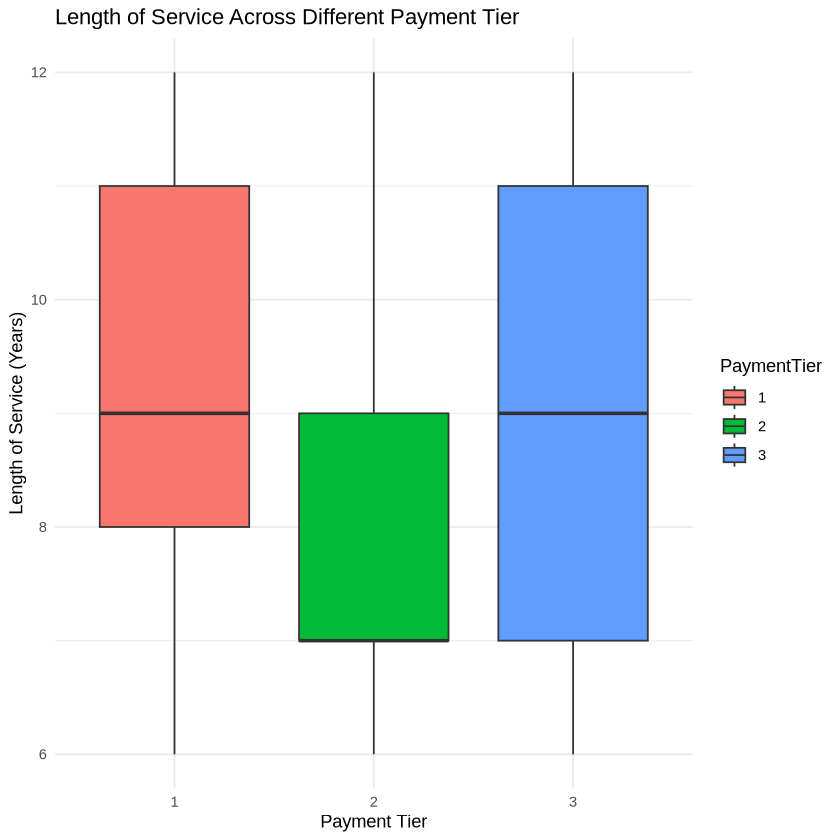

In [213]:
employee_plot

### Interpretation:
- This plot illustrates the distribution of employees' lengths of service within each payment tier.
- It addresses my research question by showing whether higher payment tiers are associated with longer lengh of service


#### Insights from the Box Plot

**Median Comparison**:  
   - The median length of service is highest for **Payment Tier 1** and **Payment Tier 3**.  
   - **Payment Tier 2** has a noticeably lower median compared to the other tiers.

 **Spread of Data**:  
   - **Tier 1**: The data is spread between approximately **7 and 11 years**, indicating moderate variability.  
   - **Tier 2**: This tier has the least spread (around **7 to 9 years**), indicating a low variability.  
   - **Tier 3**: The spread is wide, ranging from **6 to 10 years**, indicating high variability.
     
 **Outliers**:  
   - The plot does not show any clear outliers, meaning all data points appear to be within a reasonable range for each tier.

### Correlation Matrix with More Variables

#### Exploring the relationship betweeen variables in the dataset by using a correlation matrix

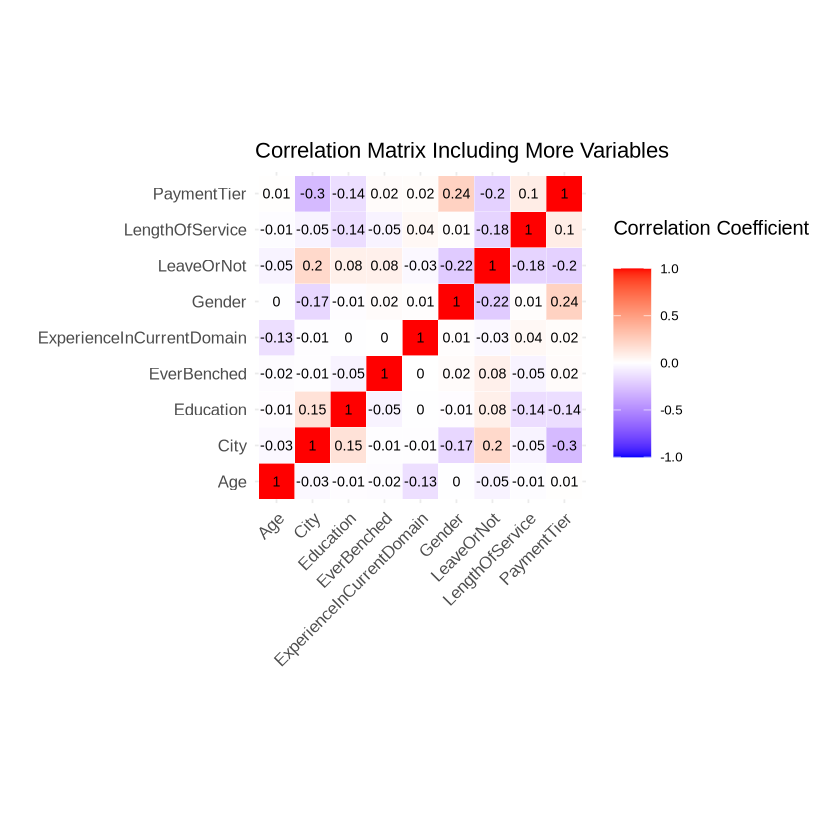

In [214]:
employee_numeric <- employee_data %>%
  mutate(
    PaymentTier = as.numeric(as.character(PaymentTier)),
    Education = as.numeric(as.factor(Education)),
    Gender = as.numeric(as.factor(Gender)),
    EverBenched = as.numeric(as.factor(EverBenched)),
    City = as.numeric(as.factor(City)),
    LeaveOrNot = as.numeric(as.character(LeaveOrNot))
  )
vars_to_correlate <- employee_numeric %>%
  select(
    Age,
    ExperienceInCurrentDomain,
    LengthOfService,
    PaymentTier,
    Education,
    Gender,
    EverBenched,
    City,
    LeaveOrNot
  )
# Compute the correlation matrix
corr_matrix_employee <- vars_to_correlate %>%
  cor()

# Convert the correlation matrix to a tidy format
corr_matrix_tidy <- corr_matrix_employee %>%
  as_tibble(rownames = "var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")

# Create the correlation matrix heatmap
plot_corr_matrix_employee <- 
  corr_matrix_tidy %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_gradient2(
    low = "blue", high = "red", mid = "white",
    midpoint = 0, limit = c(-1, 1), space = "Lab",
    name = "Correlation Coefficient \n"
  ) +
  labs(
    title = "Correlation Matrix Including More Variables",
    x = "", y = ""
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, size = 10, hjust = 1),
    axis.text.y = element_text(size = 10),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 8),
    legend.key.size = unit(0.8, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var2, var1, label = round(corr, 2)), color = "black", size = 3)

# Display the plot
print(plot_corr_matrix_employee)

#### From the above correlation matrix
- We can see that the none of the variables have a high correlation which can suggest that they are relatively independent when using on the prediction models 
- Which implies there may not be multicollinearity issues between variables, allowing for more reliable coefficient estimates in models.

# Methods and Plan & Computational Code and Output

### Question of Interest : Whether an employee will leave the company based on various factors?

#### Proposed Method: Logistic Regression
To do this, we will:
- **Split the Data :** Divide the dataset into training and testing data, we will use a 70-30 for this data.
- **Performe LASSO Regularization:** Apply LASSO on the traning data to shrink less important coeffcient towards 0, and select the most relevant preditors before fitting to the model
- **Model Evaluation:** After fitting the model, we will compare its performance using AUC to evaluate its ability
  

#### Why is this method appropriate?
- **Binary Outcome Variable:** The tagert Variable LeaveOrNot is binary (1 for leaving and 0 for staying), making it appropriate to use logistic regression
- **Using Multiple Predictors:** Logistic regression allows using various explanatory variables (e.g. Education, Age, etc) to model the probability of leaving or staying

#### Assumptions Required:
- **Independence of Observation:** Each employee's decision to leave is independent to others
- **No Multicollinearity:** Predictors are not highly correlated with each others.

#### Potential Limitations or Weaknesses
- **Multicollinearity :** Although we assume that predictors are not highly correlated, but high correlation between predictors can affect the model.
- **Overfitting:** Include too many irrelevant predictors.




# Computational Code and Output

Since JoiningYear and LengthOfService depend on the assumption that the employee has not left the company and can change annually, we will exclude these variables from our model to avoid potential biases.


In [215]:
employee_data <- employee_data %>%
  select(-JoiningYear, -LengthOfService)

head(employee_data)

Education,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>
Bachelors,Bangalore,3,34,Male,No,0,0
Bachelors,Pune,1,28,Female,No,3,1
Bachelors,New Delhi,3,38,Female,No,2,0
Masters,Bangalore,3,27,Male,No,5,1
Masters,Pune,3,24,Male,Yes,2,1
Bachelors,Bangalore,3,22,Male,No,0,0


#### Preparing Data and spliting data into (70 - 30 splits)

In [216]:
set.seed(123)

#Make Sure LeaveOrNot is a Binary factor
employee_data$LeaveOrNot <- as.factor(employee_data$LeaveOrNot)
split <- initial_split(employee_data, prop = 0.7)

employee_training <- training(split)
employee_testing <- testing(split)

# Create Model Matrix for training data
model_matrix_X_train <- model.matrix(LeaveOrNot ~ ., data = employee_training)[,-1]

# Create response vector for training data
matrix_Y_train <- as.matrix(as.numeric(employee_training$LeaveOrNot) - 1, ncol = 1)



#### Create Dummy Variables 

In [217]:
employee_training_dummies <- employee_training %>%
  mutate(
    EducationMasters = ifelse(Education == "Masters", 1, 0),
    CityNew_Delhi = ifelse(City == "New Delhi", 1, 0),
    CityPune = ifelse(City == "Pune", 1, 0),
    PaymentTier2 = ifelse(PaymentTier == 2, 1, 0),
    PaymentTier3 = ifelse(PaymentTier == 3, 1, 0),
    GenderMale = ifelse(Gender == "Male", 1, 0),
    EverBenchedYes = ifelse(EverBenched == "Yes", 1, 0)
  )

#### Using cv.glmnet with 10 fold cross-validation to find optimal lambda

In [218]:
set.seed(123)
cv_lasso <- cv.glmnet(
       x = model_matrix_X_train, 
       y = matrix_Y_train,
       alpha = 1,
       family = "binomial",
       type.measure = "auc",
       nfolds = 6)

cv_lasso


Call:  cv.glmnet(x = model_matrix_X_train, y = matrix_Y_train, type.measure = "auc",      nfolds = 6, alpha = 1, family = "binomial") 

Measure: AUC 

      Lambda Index Measure       SE Nonzero
min 0.001843    46  0.7063 0.008623      10
1se 0.013004    25  0.6991 0.009919       9

#### Visualizing the result of cross-validation AUC for each lambda

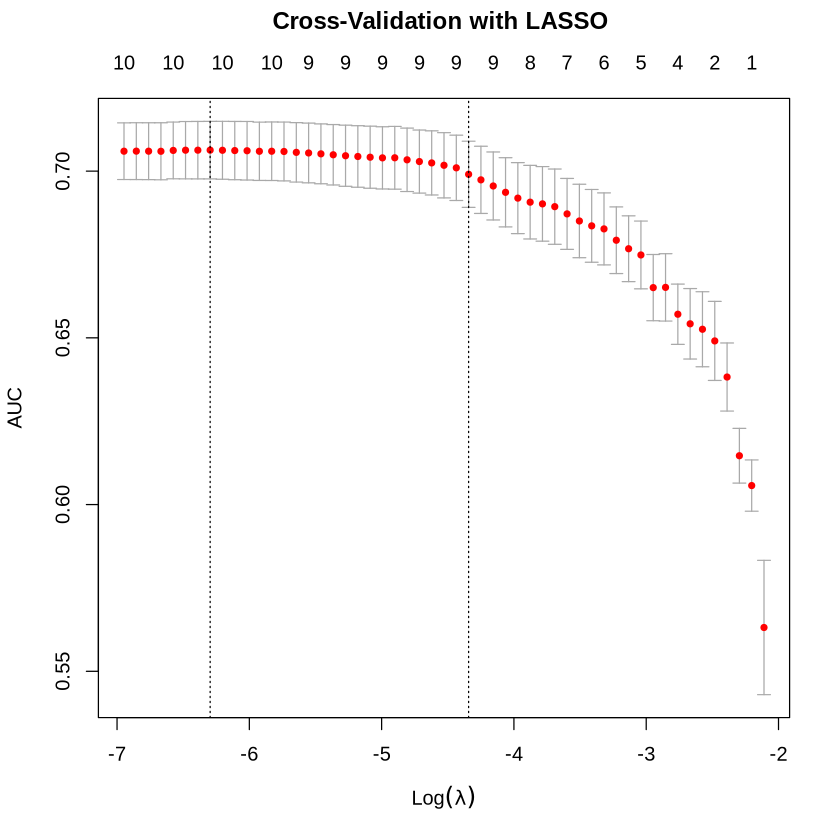

In [219]:
plot(cv_lasso , main = "Cross-Validation with LASSO \n\n")

In [220]:
# Finding the best lambda that have the max AUC
set.seed(123)
best_lambda <- round(cv_lasso$lambda.1se, 4)
best_lambda

[1] 0.013

#### Use the best_lambda for LASSO to select the relevant predictors using glmnet

In [221]:
set.seed(123)

lasso_model <-  glmnet(
    x =  model_matrix_X_train,
    y = matrix_Y_train,
    alpha = 1,
    family = "binomial",
    lambda = best_lambda
)

coefficients <- coef(lasso_model)
coefficients

11 x 1 sparse Matrix of class "dgCMatrix"
                                   s0
(Intercept)               -0.04053968
EducationMasters           0.50530196
EducationPHD               .         
CityNew Delhi             -0.17999445
CityPune                   0.45714732
PaymentTier2               0.62551244
PaymentTier3              -0.13222936
Age                       -0.01544429
GenderMale                -0.64121317
EverBenchedYes             0.40742453
ExperienceInCurrentDomain -0.02420585

We can see EducationPHD have a coeffcient 0 which we will elminiate it and use EducationMasters, and use the other variables 

In [222]:
coef_df <- as.data.frame(as.matrix(coefficients))

coef_df <- coef_df %>%
  rownames_to_column(var = "Predictor")|>
 rename(Coefficient = `s0`)
# Identify non-zero coefficients (excluding intercept)
non_zero_coefs <- coef_df %>%
  filter(Coefficient != 0 & Predictor != "(Intercept)")
non_zero_coefs

Predictor,Coefficient
<chr>,<dbl>
EducationMasters,0.50530196
CityNew Delhi,-0.17999445
CityPune,0.45714732
PaymentTier2,0.62551244
PaymentTier3,-0.13222936
Age,-0.01544429
GenderMale,-0.64121317
EverBenchedYes,0.40742453
ExperienceInCurrentDomain,-0.02420585


#### Cleaning Previous Data

In [223]:
# Replace spaces with underscores, for New  Delhi 
colnames(employee_data) <- gsub(" ", "_", colnames(employee_data))
non_zero_coefs$Predictor <- gsub(" ", "_", non_zero_coefs$Predictor)


#### Fitting the Logistic Regression Model

In [224]:
# Fit the model using the dummy variables
final_model <- glm(
  formula = LeaveOrNot ~ EducationMasters + CityNew_Delhi + CityPune +
    PaymentTier2 + PaymentTier3 + Age + GenderMale + EverBenchedYes + ExperienceInCurrentDomain,
  data = employee_training_dummies,
  family = "binomial"
)
final_model


Call:  glm(formula = LeaveOrNot ~ EducationMasters + CityNew_Delhi + 
    CityPune + PaymentTier2 + PaymentTier3 + Age + GenderMale + 
    EverBenchedYes + ExperienceInCurrentDomain, family = "binomial", 
    data = employee_training_dummies)

Coefficients:
              (Intercept)           EducationMasters  
                  0.67274                    0.76577  
            CityNew_Delhi                   CityPune  
                 -0.46917                    0.46782  
             PaymentTier2               PaymentTier3  
                  0.71964                   -0.15205  
                      Age                 GenderMale  
                 -0.03236                   -0.80663  
           EverBenchedYes  ExperienceInCurrentDomain  
                  0.61940                   -0.07398  

Degrees of Freedom: 3256 Total (i.e. Null);  3247 Residual
Null Deviance:	    4180 
Residual Deviance: 3753 	AIC: 3773

#### Prepare the Test Data

In [225]:
employee_testing_dummies <- employee_testing %>%
  mutate(
    EducationMasters = ifelse(Education == "Masters", 1, 0),
    CityNew_Delhi = ifelse(City == "New Delhi", 1, 0),
    CityPune = ifelse(City == "Pune", 1, 0),
    PaymentTier2 = ifelse(PaymentTier == 2, 1, 0),
    PaymentTier3 = ifelse(PaymentTier == 3, 1, 0),
    GenderMale = ifelse(Gender == "Male", 1, 0),
    EverBenchedYes = ifelse(EverBenched == "Yes", 1, 0)
  )

#### Making Prediction on the Testing Data

In [226]:
final_predictions <- predict(final_model, newdata = employee_testing_dummies, type = "response")

# Evaluate model performance using ROC curve and AUC
roc_curve <- roc(employee_testing$LeaveOrNot, final_predictions)
auc_value <- auc(roc_curve)


Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [227]:
performance_table <- data.frame(
  Metric = c("AUC"),
  Value = c(round(auc_value, 4))
)
performance_table

Metric,Value
<chr>,<dbl>
AUC,0.7258


### Conclusion

Based on the AUC value of 0.7258, the logistic regression model with LASSO regularization shows an acceptable predictive performance on whether the employees will leave or stay. The model identifies significant predictors such as education, city, payment tier, age, gender, bench status, and experience in current domain, which influence employee turnover.  A non one AUC suggests that there is still room for improvement, which can due to data limitation or model assumpption from the beginning. 